<a href="https://colab.research.google.com/github/anitatan2003/python-problems/blob/main/fashion_mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.19.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top',  'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Number of training images: ", len(train_images))
print("Number of test images: ", len(test_images))



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training images:  60000
Number of test images:  10000


In [ ]:
labels = set(train_labels)

print("Label\t\tClass")

for label in labels:
  print(label,"\t\t",class_names[label])

Label		Class
0 		 T-shirt/top
1 		 Trouser
2 		 Pullover
3 		 Dress
4 		 Coat
5 		 Sandal
6 		 Shirt
7 		 Sneaker
8 		 Bag
9 		 Ankle boot


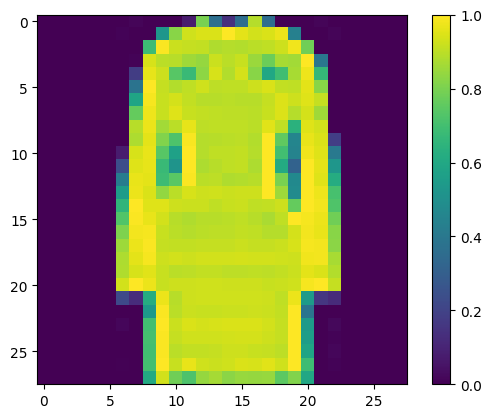

In [ ]:
#plot the first image in our fashion dataset
train_images = train_images / 255.0 #scaling the values from 0 to 255, to 0 to 1
test_images = test_images / 255.0

plt.figure() #create a new figure. a blank canvas to draw the plot
plt.imshow(train_images[500]) #displays the img from our "train_image" array
plt.colorbar() #adds a color bar to the side of the image and indicates the mapping of data values to colors
plt.grid(False) #remove grid lines
plt.show() #show our plot in the console with the img, color bar and no grid lines

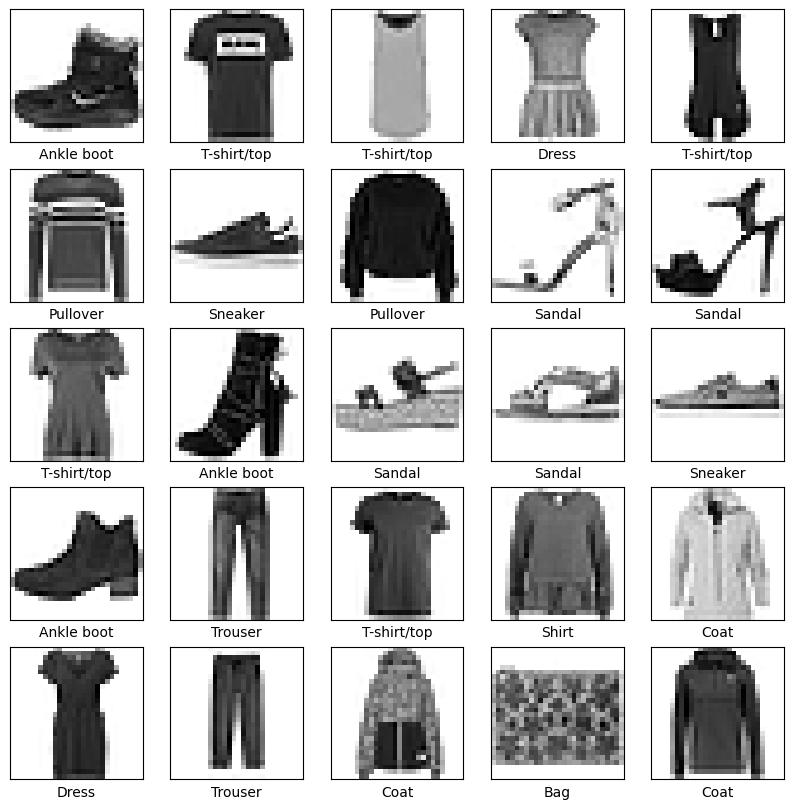

In [ ]:
#print out first 25 imgs from training set & display class name
plt.figure(figsize=(10,10)) #blank canvas
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#setting up layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =['accuracy'])

#feed and train the model
model.fit(train_images, train_labels, epochs = 10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7811 - loss: 0.6364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8603 - loss: 0.3900
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8749 - loss: 0.3440
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8838 - loss: 0.3143
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8908 - loss: 0.2970
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8953 - loss: 0.2826
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9007 - loss: 0.2696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9033 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9055 - loss: 0.2508
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9128 - loss: 0.2354


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.02449665e-13 3.53723093e-14 4.62508612e-13 1.06822268e-11
 4.39616482e-10 1.16639093e-13 4.86334107e-12 4.17609903e-13
 9.99999940e-01 8.64804069e-16]
Model predicts:  Bag


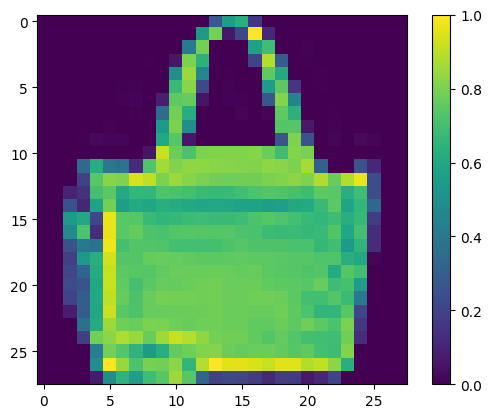

In [ ]:
#attach a softmax layer to converts the model's linear outputs to probilities - makes it easier to interpret
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

#classify the images in the test category
predictions = probability_model.predict(test_images)
print(predictions[2561])

label = np.argmax(predictions[2561])
print("Model predicts: ", class_names[label])

#check
plt.figure() #makes a blank canvas
plt.imshow(test_images[2561])
plt.colorbar()
plt.grid(False)
plt.show()